In [12]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
#read the pickled data
pickle_in = open(os.path.join(os.getcwd(), 'data', 'processed', 'all_data.pickle'), 'rb')
data = pickle.load(pickle_in)

#This copy will hold the inflation adjusted values
data_short = data.copy()

#the scorers for monetary variables is the middle value of the bin with assumed
#values for the uppermost bin
income_scorer = np.array([5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5,
                          55, 67.5, 87.5, 112.5, 137.5, 175, 300]) * 1000
rent_scorer = np.array([50, 125, 175, 225, 275, 325, 375, 425, 475, 525, 575,
                        625, 675, 725, 775, 850, 950, 1125, 1375, 1750, 2500])
value_scorer = np.array([5, 12.5, 17.5, 22.5, 27.5, 32.5, 27.5, 45, 55, 65, 75, 
                         85, 95, 112.5, 137.5, 162.5, 187.5, 225, 275, 350, 450, 
                         625, 875, 1500]) * 1000
#education gets a simple 1-8 score
education_scorer = np.arange(1, 8)

#to adjust the values to 2016 dollars, the index are adjusted by the 
#yearly average consumer price index 
inflation_correction = np.array([1.39422697, 1.11865482, 1.10084296, 1.06686838,
                                 1.04536021, 1.03039158, 1.01380104, 1.01263642, 
                                 1.00000000])

#these are special cases and need to be dropped (make description below)
to_drop = [48453980000, 48453002319, 48453001606]

for i, year in enumerate(data.keys()):
    for key in data[year].keys():
        tmp = data[year][key]
        #bust out the total population and total households from the race and families df
        if key == 'race':
            population = tmp['total_population'].to_frame()
        if key == 'families':
            households = tmp['total_households'].to_frame()
        #convert columns to percentages and drop the total
        tmp = tmp[tmp.columns[1:]].divide(tmp[tmp.columns[0]], axis=0).fillna(0)
        #calculate the index (single number to represent bins) 
        if len(tmp.columns) > 1:
            if key == 'income':
                tmp['income_index'] = tmp.dot(income_scorer) * inflation_correction[i]
            elif key == 'rent':
                tmp['rent_index'] = tmp.dot(rent_scorer) * inflation_correction[i]
            elif key == 'value':
                tmp['value_index'] = tmp.dot(value_scorer) * inflation_correction[i]
            elif key == 'education':
                tmp['education_index'] = tmp.dot(education_scorer)
        #put the new percentage dataframe back in
        #data[year][key] = tmp.drop(to_drop)
        #data_short[year][key] = tmp[tmp.columns[-1]].copy().drop(to_drop).to_frame()
        data[year][key] = tmp[tmp.columns[-1]].copy().drop(to_drop).to_frame()

In [53]:
for i, key in enumerate(data.keys()):
    if i == 0:
        income = data[key]['income']['income_index'].to_frame()
        income.columns = [key]
    else:
        income[key] = data[key]['income']['income_index']

In [54]:
income['diff'] = income['2016'] - income['2000']

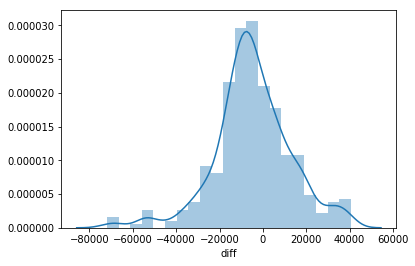

In [55]:
sns.distplot(income['diff'])

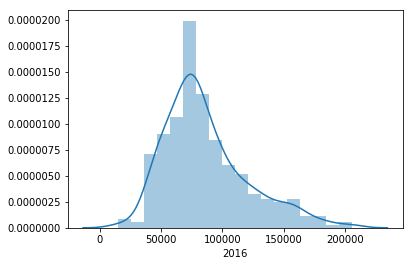

In [56]:
sns.distplot(income['2016'])

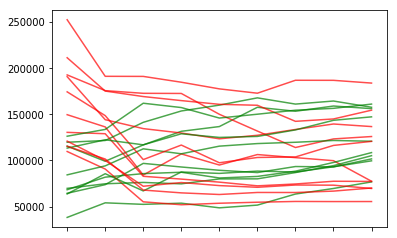

In [58]:
for i in range(10):
    income.sort_values(by='diff', ascending=False).iloc[i][income.columns[:-1]].plot(color='green', alpha=0.7)
    income.sort_values(by='diff').iloc[i][income.columns[:-1]].plot(color='red', alpha=0.7)

In [19]:
income.sort_values(by='diff', ascending=False).head(20)

,2000,2009,2010,2011,2012,2013,2014,2015,2016,diff
geoid,,,,,,,,,,
48453001100,82720.348205,88498.385361,105978.478478,123142.667845,130575.000000,152695.872683,150961.212737,156711.100717,155870.851371,73150.503166
48209010805,85740.901213,108556.682995,128150.244798,143720.670391,152746.550843,162576.481836,158597.889537,162055.049669,157350.687623,71609.786410
48491020603,90418.269231,119261.926193,146897.928356,147196.815027,139378.099962,145432.247316,152067.495560,154253.401986,160783.012004,70364.742774
48453001765,92600.710900,111878.474219,113990.368509,119393.881816,125284.784378,130003.521127,138041.535226,148605.483937,159014.353573,66413.642672
48491020112,81218.181818,109237.077535,106064.471243,120619.621343,119364.864865,122124.550360,131048.094374,141477.900552,146996.073298,65777.891480
48491020706,82449.899800,90715.317919,109580.863675,127894.965278,130206.532181,140153.669725,145492.216117,147714.416058,147292.993631,64843.093831
48491020106,86468.413978,89455.871354,145513.663968,144076.655052,145921.592775,148556.547619,134790.492958,136927.152318,148010.985353,61542.571374
48491020315,75478.547855,89820.512821,103641.602634,124425.787728,107726.962457,111707.317073,120842.548710,124793.095005,136916.214995,61437.667141
48491020109,77056.303550,88069.960861,115576.744186,128093.596059,122345.647773,130412.168793,132832.201746,141177.015755,137905.770965,60849.467415


In [61]:
data['2000'].keys()

dict_keys(['income', 'education', 'race', 'families', 'rent', 'value', 'unemployment'])

In [20]:
income.loc?

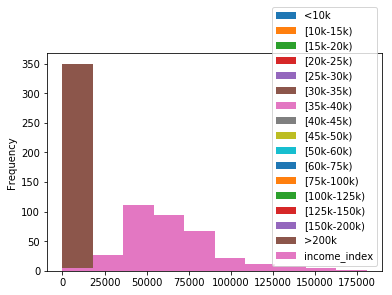

In [21]:
data['2000']['income'].plot(kind='hist')

In [22]:
x = data['2000']['income']

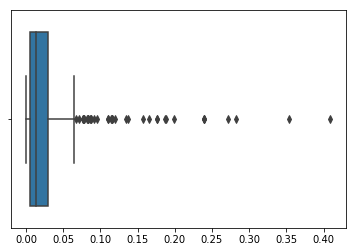

In [23]:
sns.boxplot(x=['>200k'], data=x)

In [59]:
data_2000 = data['2000'].copy()
for col in data_2000.keys():
    tmp = data_2000[col]
    tmp = tmp[tmp.columns[1:]].divide(tmp[tmp.columns[0]], axis=0).fillna(0)
    if len(tmp.columns) > 1:
        tmp = tmp.dot(np.arange(1, len(tmp.columns)+1)).to_frame()
    data_2000[col] = tmp

In [60]:
cols = list(data_2000.keys())
dfs = [data_2000[col] for col in cols]
d00 = pd.concat(dfs, axis=1)
d00.columns = cols
d00.head()

ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2363c240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2213dcf8>]], dtype=object)

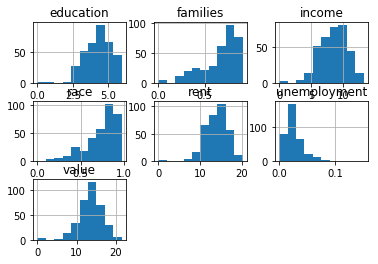

In [30]:
d00.hist()

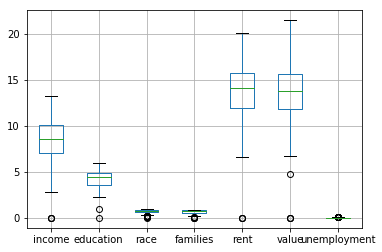

In [33]:
d00.boxplot()

In [47]:
d00[d00.value == 0]

,income,education,race,families,rent,value,unemployment
geoid,,,,,,,
48453001606,0.0,1.00000,0.70000,0.0,0.0,0.0,0.0
48453980000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0
48453002319,0.0,2.75848,0.39573,0.0,0.0,0.0,0.0


#### geoid 48453001606 is the Austin State Supported Living Center

#### geoid 48453002319 is the Travis County Correctional Complex

#### geoid 48453001753 is Braker and Mopac - all biz and apt, no home value

#### geoid 48453000203 is the Austin State Hospital and Central Market, no home value

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
d00_ss = ss.fit_transform(d00)
d00_ss = pd.DataFrame(d00_ss, index=d00.index, columns=d00.columns)
d00_ss.head()

,income,education,race,families,rent,value,unemployment
geoid,,,,,,,
48021950100,-0.271527,-0.727558,0.672171,0.506809,-1.493455,-0.542534,-0.525260
48021950200,-0.666971,-1.228788,-0.321527,0.320864,-1.370372,-0.956606,0.353741
48021950300,-0.146008,-0.671184,0.399949,0.392004,-1.077043,-0.360963,0.178812
48021950400,-0.342194,-0.232034,0.159988,0.210334,-0.874070,-0.252673,-0.542693
48021950600,-0.636290,-0.892292,0.817939,0.246987,-1.353783,-0.888225,0.256572


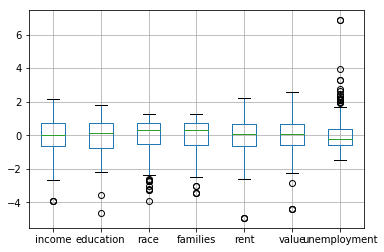

In [41]:
d00_ss.boxplot()

In [34]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler(feature_range=(0, 1))
d00_sc = mmsc.fit_transform(d00)
d00_sc_df = pd.DataFrame(d00_sc, index=d00.index, columns=d00.columns)

In [35]:
d00_sc_df.head()

,income,education,race,families,rent,value,unemployment
geoid,,,,,,,
48021950100,0.601259,0.607732,0.885631,0.838009,0.479020,0.554709,0.112261
48021950200,0.536328,0.529912,0.694509,0.798674,0.496202,0.495404,0.218053
48021950300,0.621869,0.616484,0.833274,0.813723,0.537149,0.580715,0.197000
48021950400,0.589656,0.684665,0.787121,0.775292,0.565484,0.596225,0.110163
48021950600,0.541366,0.582155,0.913667,0.783046,0.498517,0.505197,0.206358


In [36]:
x = d00_sc_df.copy()

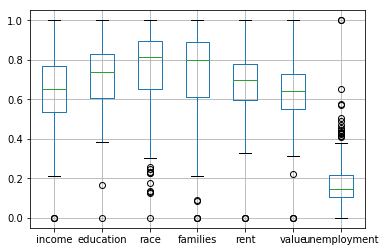

In [37]:
x.boxplot()

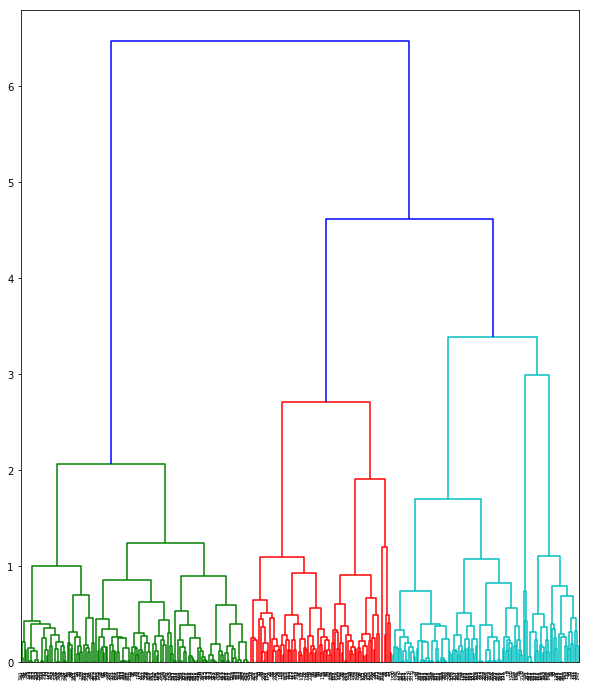

In [8]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 12))
dendrogram = sch.dendrogram(sch.linkage(d00_sc, method='ward'))

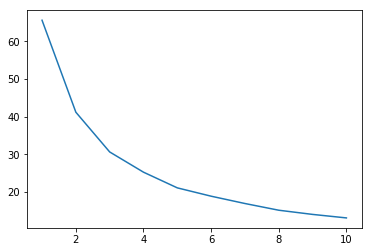

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10)
    kmeans.fit(d00_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

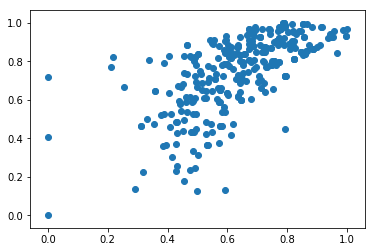

In [153]:
plt.scatter(d00_sc[:, 0], d00_sc[:, 2])

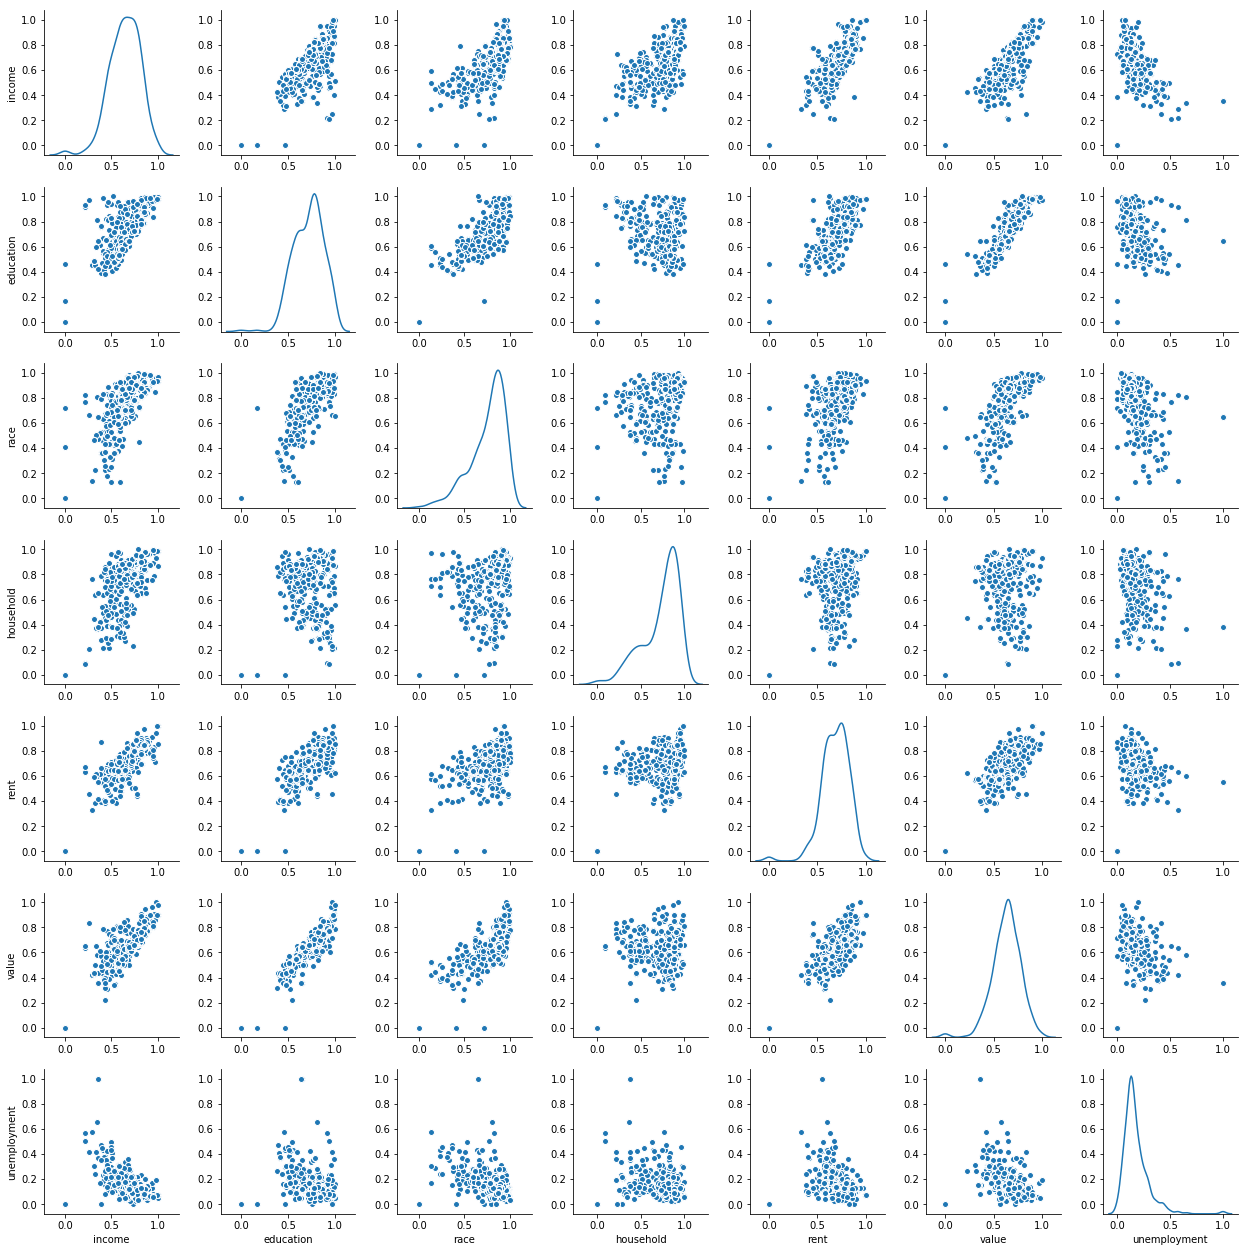

In [8]:
sns.pairplot(d00_sc_df, diag_kind='kde')

In [7]:
corr = d00_sc_df.corr()
sns.heatmap(corr, annot=True)

NameError: name 'd00_sc_df' is not defined

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(d00_sc)
pca.explained_variance_ratio_

array([ 0.57154303,  0.24979652,  0.08568783,  0.05041515,  0.02621036,
        0.00929524,  0.00705186])

In [11]:
pca = PCA(n_components=2)
d00_pca = pca.fit_transform(d00_sc)

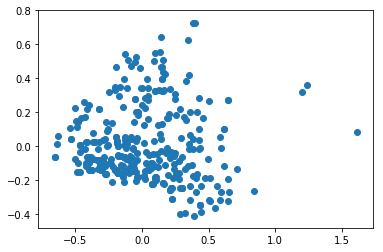

In [12]:
plt.scatter(d00_pca[:, 0], d00_pca[:, 1])

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
pca = PCA(n_components=3)
d00_pca3 = pca.fit_transform(d00_sc)

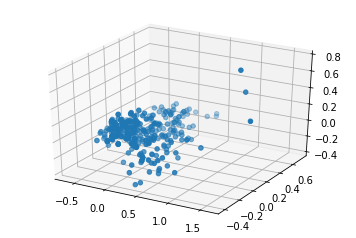

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d00_pca3[:,0], d00_pca3[:, 1], d00_pca3[:, 2])